# 4.9 part II

## Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#path
path = r'C:\Users\ggome\06-2023 Instacart Basket Analysis'

In [3]:
df_combined = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','customer_merged.pkl'))

## 2

In [4]:
#Check head
df_combined.head()

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_without_ordering,product_id,add_to_cart_order,reordered,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,Number_of_Dependants,marital_status,income
0,0,2539329,1,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,1,2398795,1,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2,473747,1,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,3,2254736,1,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,4,431534,1,5,4,15,28.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


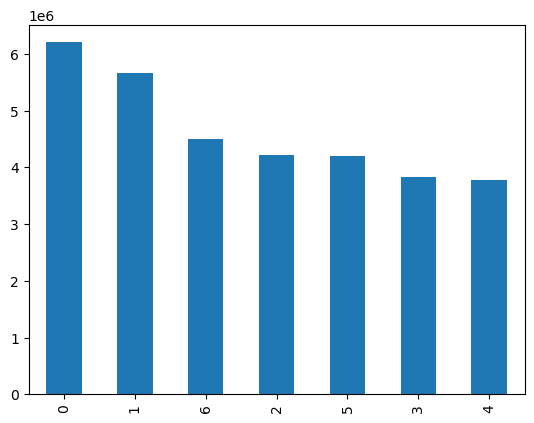

In [5]:
#Created a bar chart
bar = df_combined['orders_day_of_week'].value_counts().plot.bar()

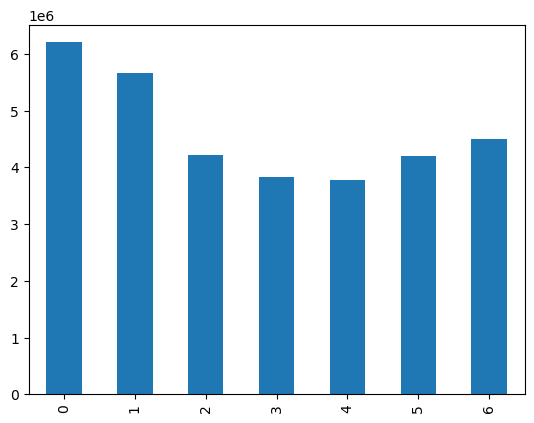

In [6]:
#Sort bar chart
bar = df_combined['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [10]:
#Exported bar chart 
path = r'C:\Users\ggome\06-2023 Instacart Basket Analysis\04  Analysis\Visualizations'
file_name = 'bar_combined.png'
full_path = os.path.join(path, file_name)

bar.figure.savefig(full_path)

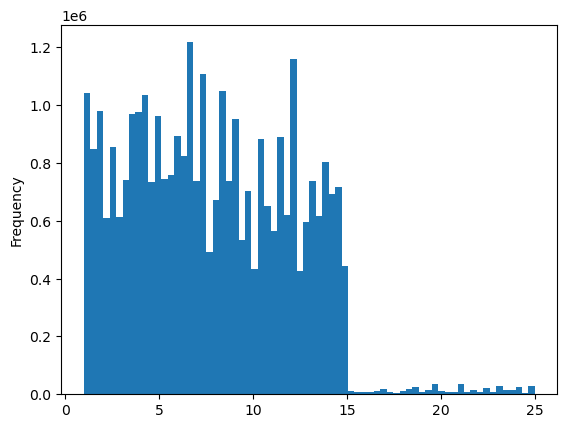

In [12]:
#Created a histogram
hist = df_combined['prices'].plot.hist(bins = 70)

In [15]:
#Exported histogram chart as an image

file_name = 'hist_prices_combined_70.png'
full_path = os.path.join(path, file_name)

hist.figure.savefig(full_path)


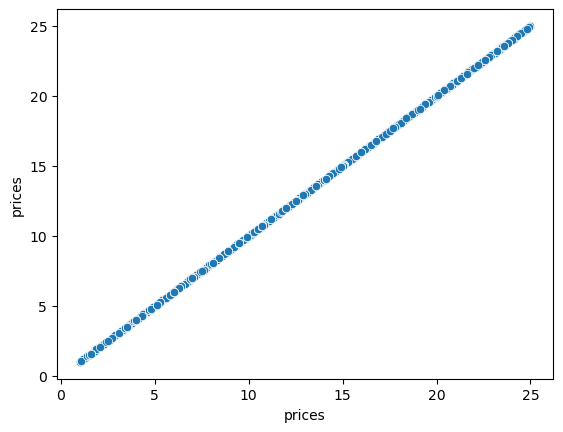

In [16]:
#Created a scatterplot
scatterplot = sns.scatterplot(x = 'prices', y = 'prices',data = df_combined)

In [17]:
#Exported scatterplot
file_name = 'scatplt_prices_combined.png'
full_path = os.path.join(path, file_name)

scatterplot.figure.savefig(full_path)

In [18]:
#Created a list holding true/false values to test the np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df_combined)) <= 0.7

In [19]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [20]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [21]:
#Store 70% of the sample in the dataframe big
big = df_combined[dev]

In [22]:
#Store 30% of the sameple in the datafreame small
small = df_combined[~dev]

In [23]:
#Check length of dataframe (# of rows)
len(df_combined)

32404859

In [24]:
len(big) + len(small)

32404859

In [25]:
# Creates new dataframe where prices and order_day_of_week columns are from the small subset
df_small = small[['orders_day_of_week','prices']]

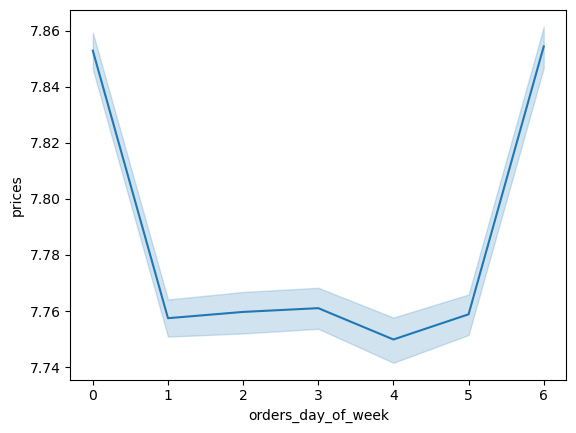

In [26]:
#Created lineplot
lineplot = sns.lineplot(data = df_small, x = 'orders_day_of_week',y = 'prices')

In [29]:
#Exported the lineplot
path = r'C:\Users\ggome\06-2023 Instacart Basket Analysis\04  Analysis\Visualizations'
file_name = 'line_ords_combined.png'
full_path = os.path.join(path, file_name)

lineplot.figure.savefig(full_path)

## 3

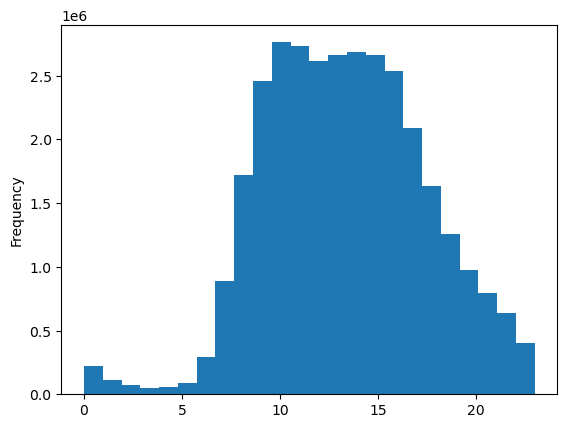

In [30]:
#Created a histogram for 'order_hour_of_day'
hist_hour = df_combined['order_hour_of_day'].plot.hist(bins = 24)

The period of highest order frequency occurs between 10am and 5pm, specifically from 10-17.

In [31]:
#Exported histogram chart as an image
file_name = 'hist_ords_hour_combined_24.png'
full_path = os.path.join(path, file_name)

## 4

In [32]:
#Created a loyalty flag
df_combined['max_order'] = df_combined.groupby(['user_id'])['order_number'].transform(np.max)

In [33]:
df_combined.head()

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_without_ordering,product_id,add_to_cart_order,reordered,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,Number_of_Dependants,marital_status,income
0,0,2539329,1,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,1,2398795,1,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2,473747,1,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,3,2254736,1,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,4,431534,1,5,4,15,28.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [34]:
df_combined.loc[df_combined['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'

In [35]:
df_combined.loc[(df_combined['max_order'] <= 40) & (df_combined['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'

In [36]:
df_combined.loc[df_combined['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [40]:
df_combined['loyalty_flag'].value_counts(dropna = False)

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

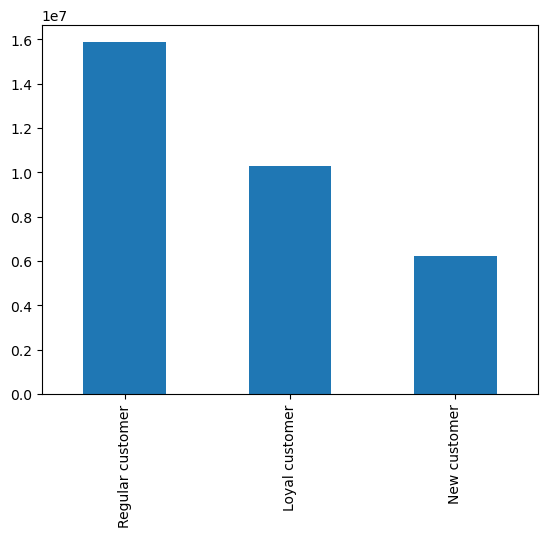

In [41]:
#Created bar chart for loyalty flagb
cust_bar = df_combined['loyalty_flag'].value_counts().plot.bar()

In [42]:
#Exported bar chart
file_name = 'cust_loyalty_flag_combined.png'
full_path = os.path.join(path, file_name)

cust_bar.figure.savefig(full_path)

## 5

In [43]:
#Created small dataframe for the columns we need with existing small database
df_small2 = small[['prices', 'order_hour_of_day'] ]

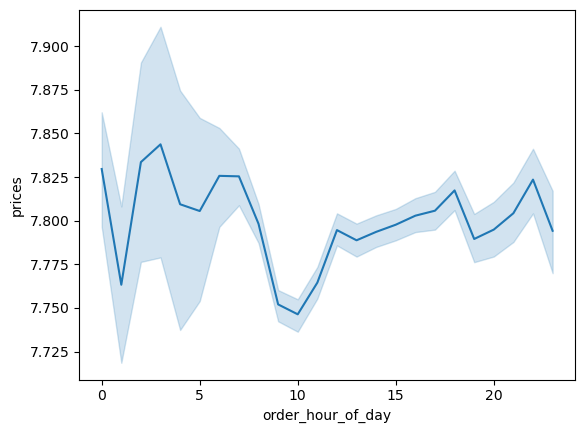

In [44]:
# lineplot for above df
line_hour = sns.lineplot(data = df_small2, x = 'order_hour_of_day',y = 'prices')

In [45]:
#Exported the lineplot
file_name = 'expenditures_hour_combined.png'
full_path = os.path.join(path, file_name)

line_hour.figure.savefig(full_path)

## 6

In [46]:
#Check to see if correlation between age and the number of dependents exists - using small database
df_small3 = small[['age', 'Number_of_Dependants']]

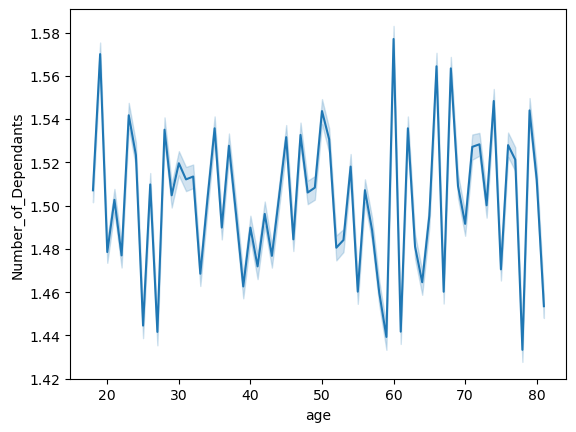

In [47]:
#lineplot from last
line_age = sns.lineplot (data = df_small3, x = 'age', y = 'Number_of_Dependants')



The line plot does not exhibit a distinct pattern or trend between age and the number of dependents. Instead, it displays significant variability across different age groups. Notably, individuals who are 18 years old or younger show a consistent absence of dependents, which aligns with the expectation that minors typically do not have dependents.

In [49]:
#Exported lineplot
file_name = 'age_dependants_connection_combined.png'
full_path = os.path.join(path, file_name)

line_age.figure.savefig(full_path)

## 7

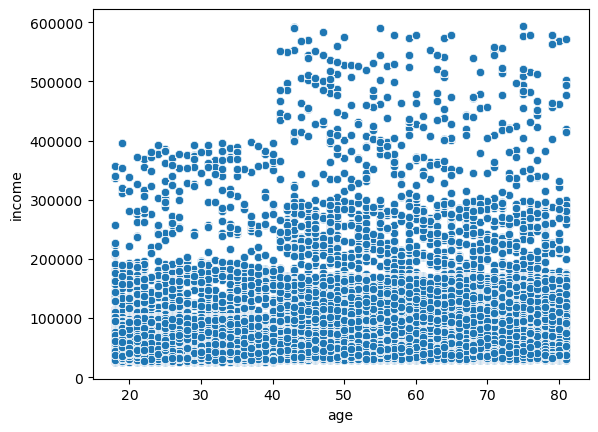

In [50]:
#Created a scatter plot for age & income
scatterplot_income = sns.scatterplot(data = df_combined, x= 'age', y = 'income')

The scatterplot above illustrates the relationship between customer age and income in 10-year increments. It is evident that a majority of customers have incomes below $200k, peaking around the 40-year-old customer's threshold. Additionally, as age increases, both income and accumulated assets tend to increase.

In [52]:
#redefining path
path = r'C:\Users\ggome\06-2023 Instacart Basket Analysis'

In [53]:
#Exported the customer_merged file
df_combined.to_pickle(os.path.join(path, '02 Data', 'Prepared Data','customer_merged_updated.pkl'))